<b><center><h1>Data Science Project # 2 : Data Set Titanic

-  This tutorial is about Data Exploartion, Feature Engineering and application of a few Machine Learning algorithms.</br>It is divided into 3 parts.
    -  Part 1: It includes exploring the Titanic Dataset, visualizing it from various ascpects and features and finding out the hidden trends in it.
    -  Part 2: It invloves the process of Feature Engineering and Data Cleaning. New features are derived from the existing ones. All features are converted into numeric values and unnecessary features are deleted from the dataset.
    -  Part 3: This part involves the application of a few machine learning algorithms and building different models. In addition to that, Tuning of Huperparameters and Cross Validations are also included in this part of the tutorial. Various models are build using different techniques so that they can be compared with each other.

<b><h2>Import Libraries</h2></b>
Importing all the libraries that will be used in the project.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Some commands show warnings. Following commands can be used to ignore them.

import warnings
warnings.filterwarnings("ignore")

<b><h2>Loading DataSet</h2></b>
Save the downloaded dataset and load in the project using the following command by giving the path to the dataset file destination.

In [2]:
# Loading the CSV file into the program.
# The path to the file destination has to be correct.

data = pd.read_csv('C:/Users/kshahid/Desktop/Literature/Python/Data/Titanic/train.csv')

In [3]:
# Selecting first 5 rows of the data.

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Adding all the NAN values present in the data per column.

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b><h1><center>Part - 1: Exploratory Data Analysis</center></h1></b></br>
This part of the project involves the analysis and exploration of the data and its features.

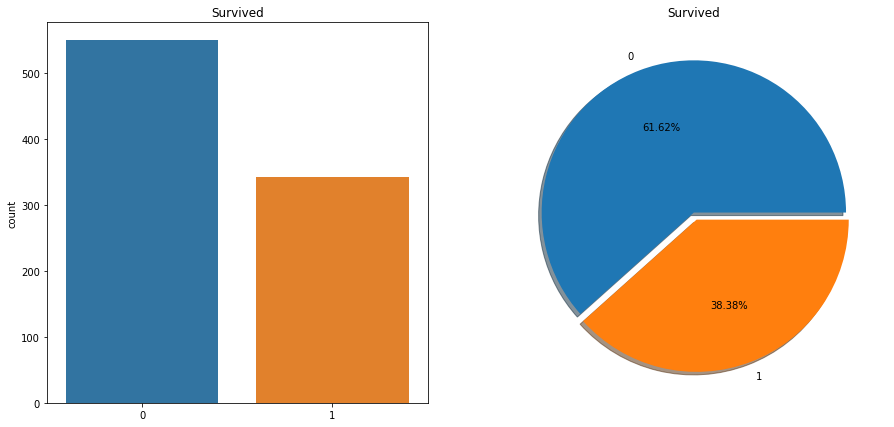

In [5]:
# Plotting 2 plots in 1 figure.

f,ax = plt.subplots(1,2, figsize=(15,7))

# Plot 1:

# Count Plot for the total number of people survived vs dead.
sns.countplot('Survived', data=data, ax=ax[0])
# Setting Title for the plot.
ax[0].set_title('Survived')
# Setting Label for the x-axis equals to nothing.
ax[0].set_xlabel('')

#Plot 2:

# Pie Chart for the total number of people survived vs dead.
data.Survived.value_counts().plot.pie(explode=[0,0.05], autopct = '%.2f%%', ax=ax[1], shadow=True)
# Setting Title for the plot.
ax[1].set_title('Survived')
# Setting Label for the x-axis equals to nothing.
ax[1].set_ylabel('')

plt.show()

<b><h2>Analying DataSet Features</h2></b>

<b><h2>Feature - 1: Sex (Categorical Feature)</h2></b>

In [6]:
# Grouping the data together with respect to Sex as outer index and Survived as inner index.
# Counting the total number of people survived vs dead with respect to their sex.

data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<b>Graph Plots

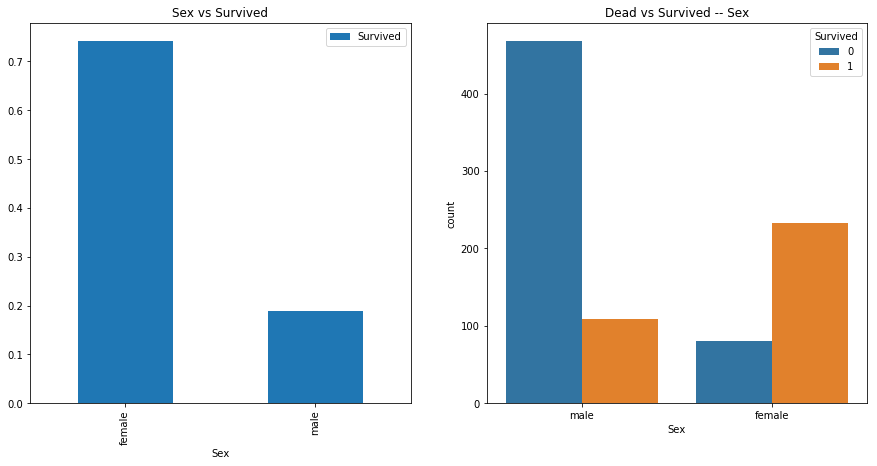

In [7]:
f,ax=plt.subplots(1,2,figsize=(15,7))

# Bar Plot for Sex vs Survived.
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex vs Survived')

# Count Plot for Sex vs Survived.
sns.countplot('Sex', hue= 'Survived', data=data, ax=ax[1])
ax[1].set_title('Dead vs Survived -- Sex')

plt.show()

<b><h2>Feature - 2: P Class (Ordinal Feature)</h2></b>

In [8]:
# Counting the total number of people survived vs dead with respect to their P Class.

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<b>Graph Plots

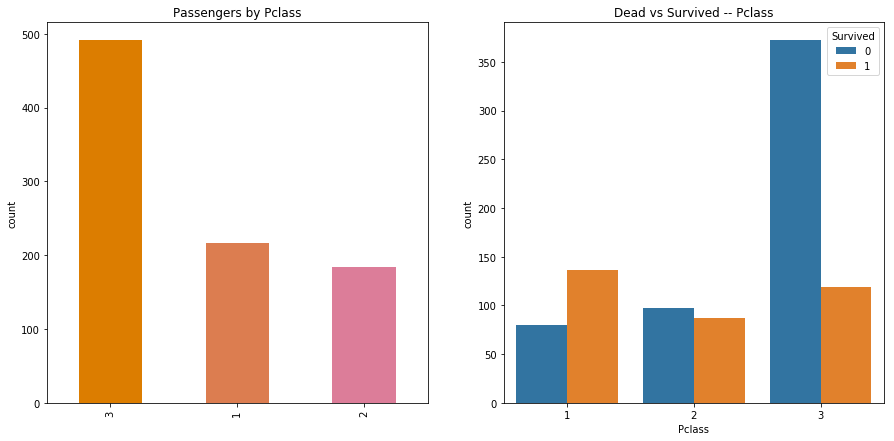

In [9]:
f, ax = plt.subplots(1,2, figsize=(15,7))

# Bar Plot for the total number of passengers on the ship with respect to their P Class.
data.Pclass.value_counts().plot.bar(color=['#DC7D00','#DC7D50','#DC7D99'],ax=ax[0])
ax[0].set_title('Passengers by Pclass')
ax[0].set_ylabel('count')

# Count Plot for the total number of passengers survived vs dead with respect to their P Class.
sns.countplot('Pclass', hue= 'Survived', data=data, ax=ax[1])
ax[1].set_title('Dead vs Survived -- Pclass')

plt.show()

<b>Analyzing Feature 1: Sex and Feature 2: P Class together.

In [10]:
# Countin the number of people survived vs dead with repect to their sex and P Class.

pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

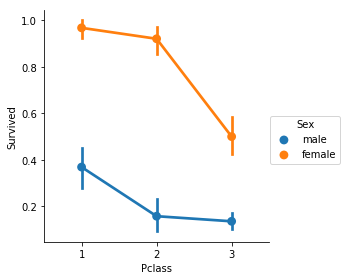

In [11]:
# Factor Plot for the number of people survived with respect to their P Class and Sex.

sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

<b><h2>Feature - 3: Age (Continuous Feature)</h2></b>

In [12]:
# Printing out the Maximum, Minimum and Average age of the passengers who boarded the ship.

print('Oldest Passenger in (years):',data['Age'].max())
print('Youngest Passenger in (years):',data['Age'].min())
print('Average Age of Passengers in (years):',data['Age'].mean())

Oldest Passenger in (years): 80.0
Youngest Passenger in (years): 0.42
Average Age of Passengers in (years): 29.69911764705882


<b>Graph Plots

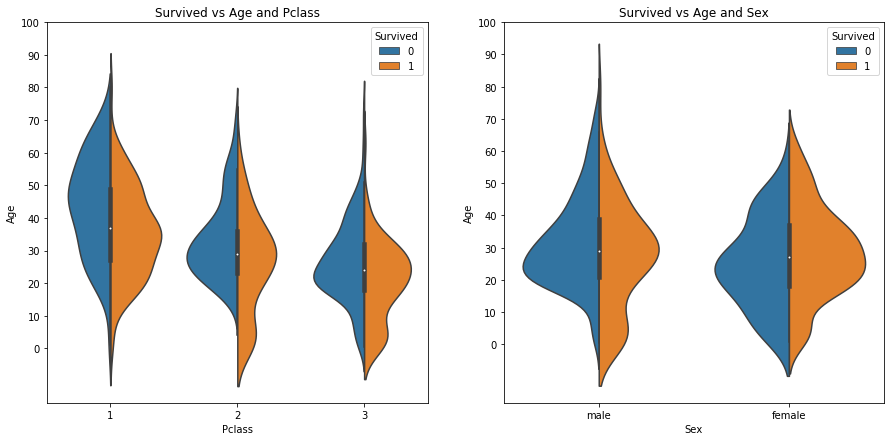

In [13]:
f, ax = plt.subplots(1,2, figsize=(15,7))

# Violin Plot for the number of people survived with respect to their Age and P Class.
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Survived vs Age and Pclass')
ax[0].set_yticks(range(0,110,10))

# Violin Plot for the number of people survived with respect to their Age and Sex.
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Survived vs Age and Sex')
ax[1].set_yticks(range(0,110,10))

plt.show()

<b>Filling NAN/NULL values in Age Column.

In [14]:
# Extracting the Salutations of the passengers from the Name column.

data['Name_Title'] = 0

for i in data:
    data['Name_Title'] = data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
# Countitng the number of people according to their salutations in their names.

pd.crosstab(data.Name_Title, data.Sex).T.style.background_gradient(cmap='summer_r')

Name_Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# Replacing Salutations with the ones that are more commonly used.

data['Name_Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer',
                            'Col','Rev','Capt','Sir','Don'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other',
                            'Other','Mr','Mr','Mr'],inplace=True)

In [17]:
# Getting the average age of the passengers according to their salutations.

data.groupby('Name_Title')['Age'].mean()

Name_Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# Allocating Ages / Filling NAN values in Age Column.
# according to the average age of people with respect to their salutation.

data.loc[(data.Age.isnull()) & (data.Name_Title == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Name_Title == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Name_Title == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Name_Title == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Name_Title == 'Other'), 'Age'] = 46

In [19]:
# Checking if there is any NAN/NULL value in Age column.

data.Age.isnull().any()

False

<b>Histograms

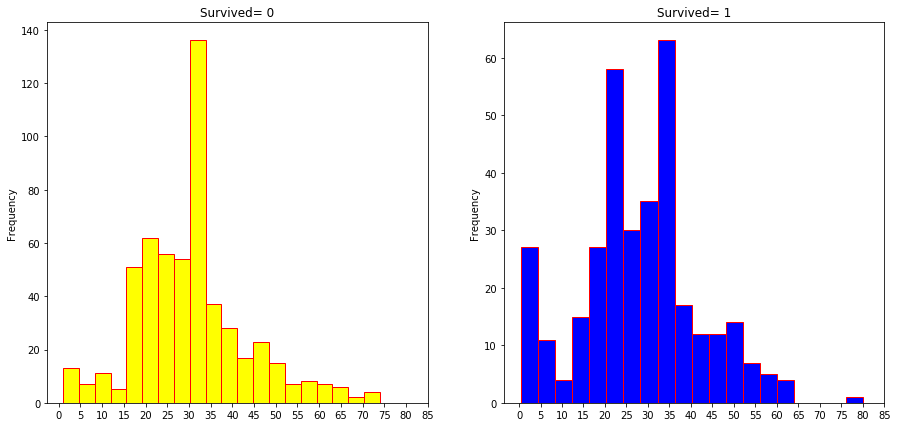

In [20]:
f,ax=plt.subplots(1,2,figsize=(15,7))

# Histogram for the people survived according to their age.
data[data['Survived']==0].Age.plot.hist(ax=ax[0],color='yellow',bins=20,edgecolor='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,90,5))
ax[0].set_xticks(x1)

# Histogram for the people died according to their age.
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='red')
ax[1].set_title('Survived= 1')
x2=list(range(0,90,5))
ax[1].set_xticks(x2)

plt.show()

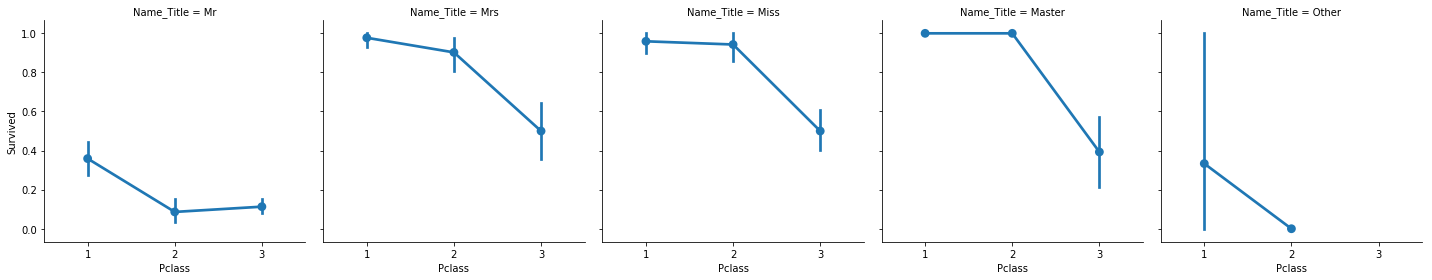

In [21]:
# Factor plot for the people survived according to their P Class and Age group (recognized through salutations).

sns.factorplot('Pclass', 'Survived', col='Name_Title', data=data)
plt.show()

<b><h2>Feature - 4: Embarked (Categorical Feature)</h2></b>

In [22]:
# Counting the number of people survived vs died according to their Sex, P Class and
# Port (Feature Embarked) from where they boarded the ship.

pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

<b>Graph Plots

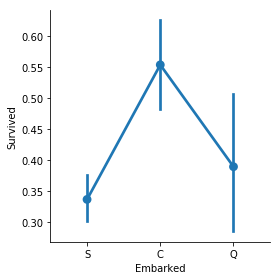

In [23]:
# Factor Plot for the number of people survived according to the port from where they embarked.

sns.factorplot('Embarked', 'Survived', data=data)

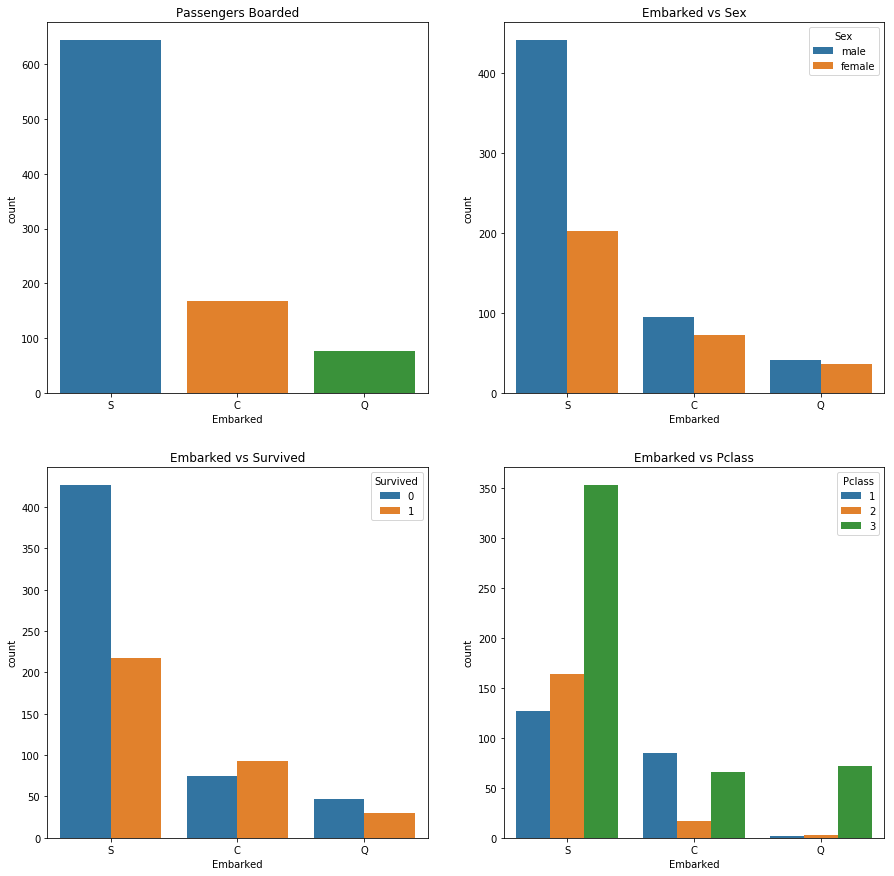

In [24]:
f, ax = plt.subplots(2,2, figsize=(15,15))

# Count Plot for the people who boarded the ship with respect to the port from where they emabarked.
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('Passengers Boarded')

# Count Plot for the people who boarded the ship with respect to their Sex and port from where they emabarked.
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Embarked vs Sex')

# Count Plot for the people who boarded the ship with respect to their Survival and port from where they emabarked.
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# Count Plot for the people who boarded the ship with respect to their P Class and port from where they emabarked.
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.show()

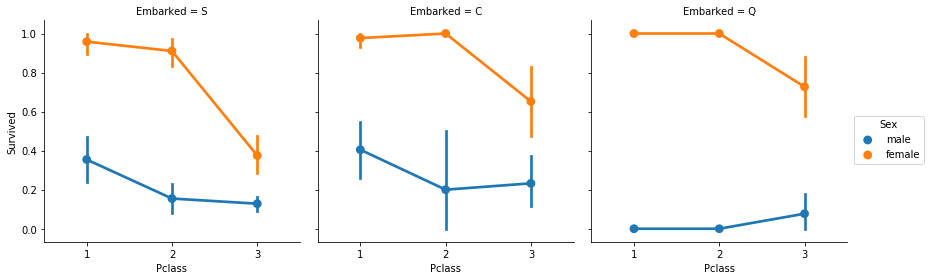

In [25]:
# Factor Plots for the number of people survived with respect to their P Class and Port.

sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [26]:
# Filling NAN/NULL values with 'S' in emabrked feature because the maxmimum number of people embarked from there.

data.Embarked.fillna('S', inplace=True)

In [27]:
# Checking if there is any NAN/NULL value in the Embarked column/feature.

data.Embarked.isnull().any()

False

<b><h2>Feature - 5: SibSp (Discrete Feature)</h2></b>

In [28]:
# Counting the number of people travelling alone or with families.

pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<b>Graph Plots

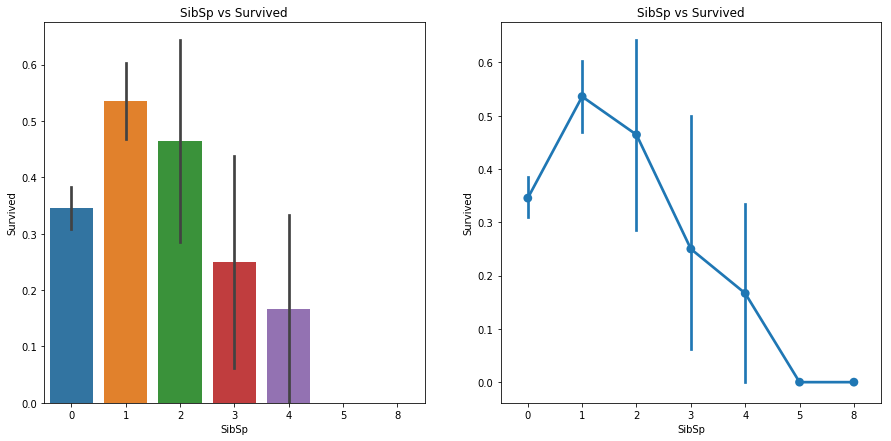

In [29]:
f, ax = plt.subplots(1,2, figsize=(15,7))

# Bar plot for the people survived vs people travelling alone or with family members.
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# Factor plot for the people survived vs people travelling alone or with family members.
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [30]:
# Counting people (travelling alone or with famila members) with respect to their P Class.

pd.crosstab(data.SibSp, data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


<b><h2>Feature - 6: Parch</h2></b>

In [31]:
# Counting the number of people travelling with their parents according to their P Class.

pd.crosstab(data.Parch, data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


<b>Graph Plots

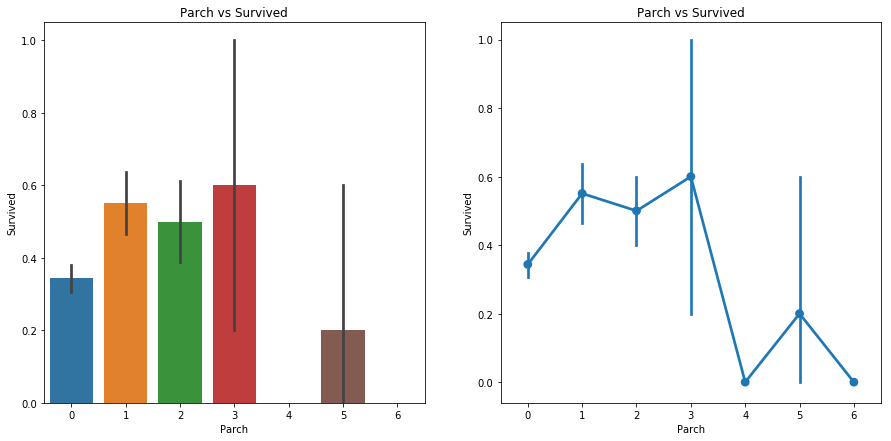

In [32]:
f, ax = plt.subplots(1,2, figsize=(15,7))

# Bar plot for the people survived according to Parch (people travelling with parents) feature.
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

# Factor plot for the people survived according to Parch (people travelling with parents) feature.
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

<b><h2>Feature - 7: Fares (Continuous Feature)</h2></b>

In [33]:
# Printing out the Maximum, Minimum and Mean Fares.

print('Highest Fare:',data['Fare'].max())
print('Lowest Fare:',data['Fare'].min())
print('Average Fare:',data['Fare'].mean())

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.2042079685746


<b>Graph Plots

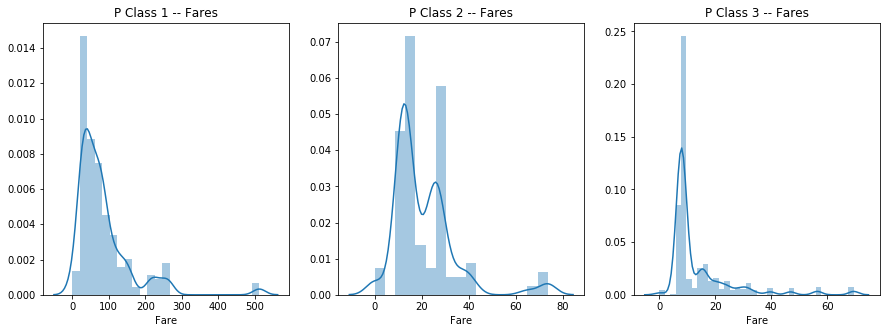

In [34]:
f, ax = plt.subplots(1,3, figsize=(15,5))

# Distribution Plots for the Fares according to P Classes.

sns.distplot(data[data.Pclass == 1].Fare, ax=ax[0])
ax[0].set_title('P Class 1 -- Fares')

sns.distplot(data[data.Pclass == 2].Fare, ax=ax[1])
ax[1].set_title('P Class 2 -- Fares')

sns.distplot(data[data.Pclass == 3].Fare, ax=ax[2])
ax[2].set_title('P Class 3 -- Fares')

plt.show()

<b><h2>Correlation between the Features</h2></b>

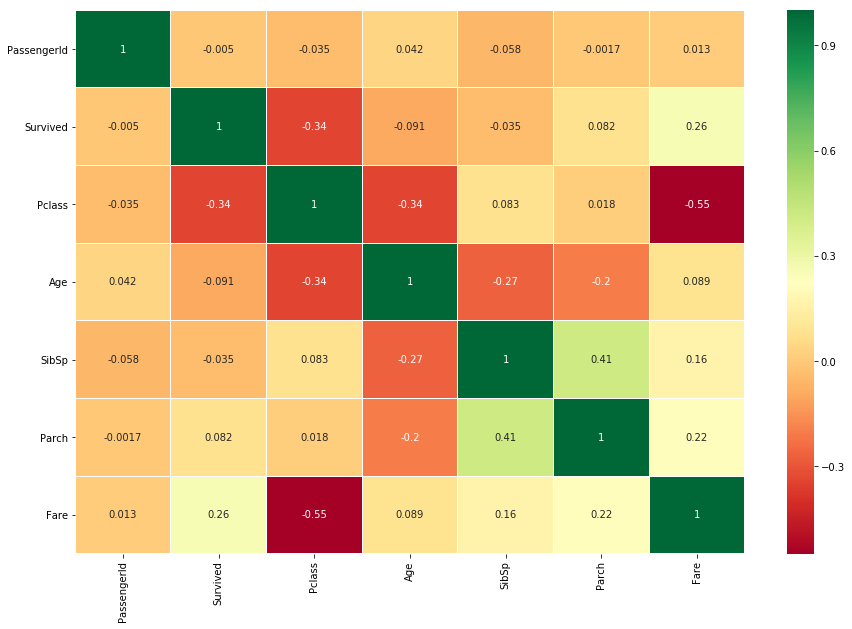

In [35]:
# Correalation Map

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

<b><h1><center>Part - 2: Feature Engineering and Data Cleaning</center></h1></b></br>
This part of the project involves manipulating the data and its features. Engineering new features and cleaning the data.</br>
To prepare the data for Predictive Modelling, it must be recognized that which features are more important and which features can be eliminated. In addition to that, new feature can also be formed by observing and extracting information from other features.

<b><h2>1. Age Band</h2></b>

Age is a contunuous feature, It can be converted into categoraical feature via binning or normalization. Below, the binning method is used for the conversion.

In [36]:
# The continuous data in the column 'Age' is divided/binned into 5 categories using a new column 'Age_Band'.

# Creating a new column named 'Age_Band' and initializing its values to 0.
data['Age_Band'] = 0

# For ages less than 0, category '0' is assigned.
data.loc[data.Age <= 16, 'Age_Band'] = 0

# For ages between 16 and 32 (32 inclusive), category '1' is assigned.
data.loc[(data.Age > 16) & (data.Age <= 32), 'Age_Band'] = 1

# For ages between 32 and 48 (48 inclusive), category '2' is assigned.
data.loc[(data.Age > 32) & (data.Age <= 48), 'Age_Band'] = 2

# For ages between 48 and 64 (64 inclusive), category '3' is assigned.
data.loc[(data.Age > 48) & (data.Age <= 64), 'Age_Band'] = 3

# For ages greater than 64, category '4' is assigned.
data.loc[(data.Age > 64), 'Age_Band'] = 4

In [37]:
# Check out the newly added feature 'Age_Band' in the dataset.

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [38]:
# Counting the number of values in each category of the 'Age Band'.

data.Age_Band.value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_Band
1,382
2,325
0,104
3,69
4,11


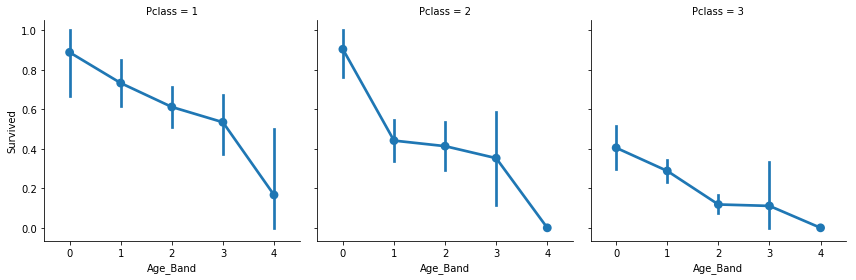

In [39]:
# Factor Plot for 'Age_Band' vs the number of people survived with respect to their P Class.

sns.factorplot('Age_Band','Survived', data=data, col='Pclass')
plt.show()

<b><h2>2. Alone and Family Size</h2></b>

Family Size feature will be derived from the features SibSp and Parch as the sum of these 2 features will give the family size. Another new feature Alone will be added that represents whether a person is travelling alone or not.

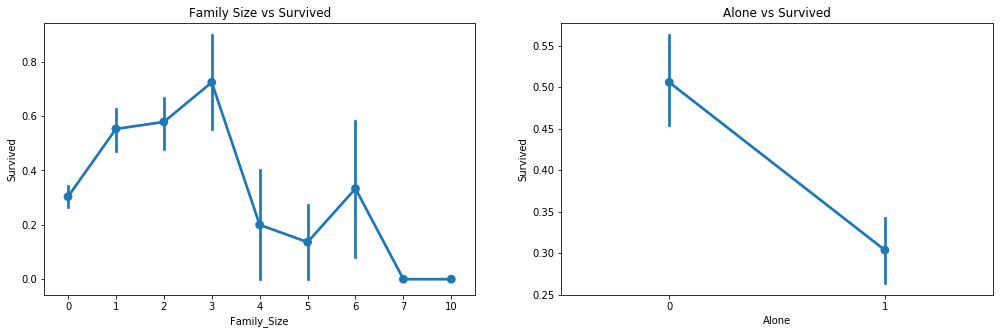

In [40]:
# Creating a new feature named 'Family_Size' and initializing it with zeros.
# Adding the number of siblings and the number of parents for each person on the ship to get the actual Family Size.
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']

# Creating a new feature named 'Alone' for the people who does not have any family member on the ship.
# People who are alone are assigned value 1 and the ones who are not alone will be assigned the value 0.
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

# Visulaizing the Features.
f, ax = plt.subplots(1,2, figsize=(17,5))

# Factor Plot for Family size vs people who survived.
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family Size vs Survived')

# Factor Plot for people travelling alone vs people who survived.
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

Analyzing the Alone features with respect to Sex.

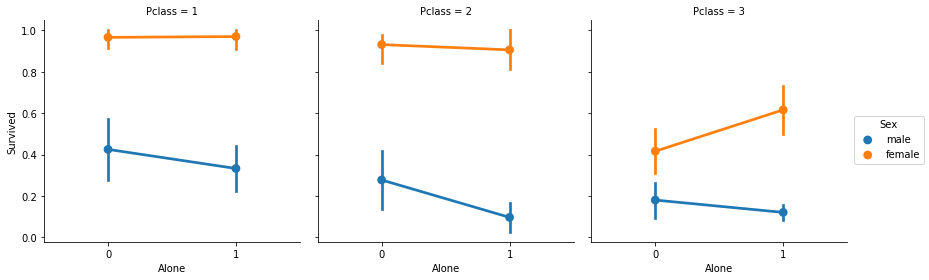

In [41]:
# Factor Plot for the people travelling alone vs the ones who survived with respect to their P Class.
sns.factorplot('Alone', 'Survived', hue='Sex', data=data, col='Pclass')
plt.show()

<b><h2>3. Fare Range</h2></b>

Fares is a contunuous feature, It can be converted into ordinal feature via qcut method that arranges the values according to the number of bins specified.

In [42]:
# Using qcut method to for the distribution of Fares into 4 parts.
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

# Claclulating the average of people survied according to the Fare range parts.
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare Range values cannot be passed as they are. They need to be converted into Singleton Values as follows.

In [43]:
# Creating a new feature named 'Fare_Category',
# so the the 4 parts of Fare Ranges made from method qcut can be used as 4 categories.
data['Fare_Category'] = 0
data.loc[data.Fare <= 7.91, 'Fare_Category'] = 0
data.loc[(data.Fare > 7.91) & (data.Fare <= 14.454), 'Fare_Category'] = 1
data.loc[(data.Fare > 14.454) & (data.Fare <= 31), 'Fare_Category'] = 2
data.loc[(data.Fare > 31), 'Fare_Category'] = 3

In [44]:
# Check out the newly added feature 'Fare_Category' in the dataset.

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_Band,Family_Size,Alone,Fare_Range,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


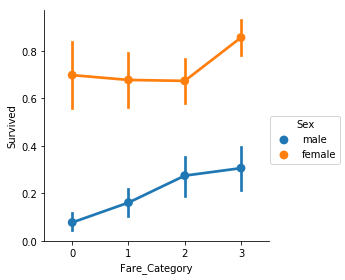

In [45]:
# Factor Plot for the number of people survived according to the Fare Categories.

sns.factorplot('Fare_Category', 'Survived', hue='Sex',data=data)
plt.show()

<b><h2>4. Converting String into Numerics</h2></b>

The features 'Sex', 'Embarked' and 'Name_Title' are strings and can be converted into numeric values as follows.

In [46]:
# Converting the String type data into numbers.

data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Name_Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [47]:
# Check out the newly created features in the dataset.

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_Band,Family_Size,Alone,Fare_Range,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [48]:
# Dropping out or deleting the unnecessary features from the dataset.

data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [49]:
# Check out the dataset after ferure generation and data cleaning.

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Name_Title,Age_Band,Family_Size,Alone,Fare_Category
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


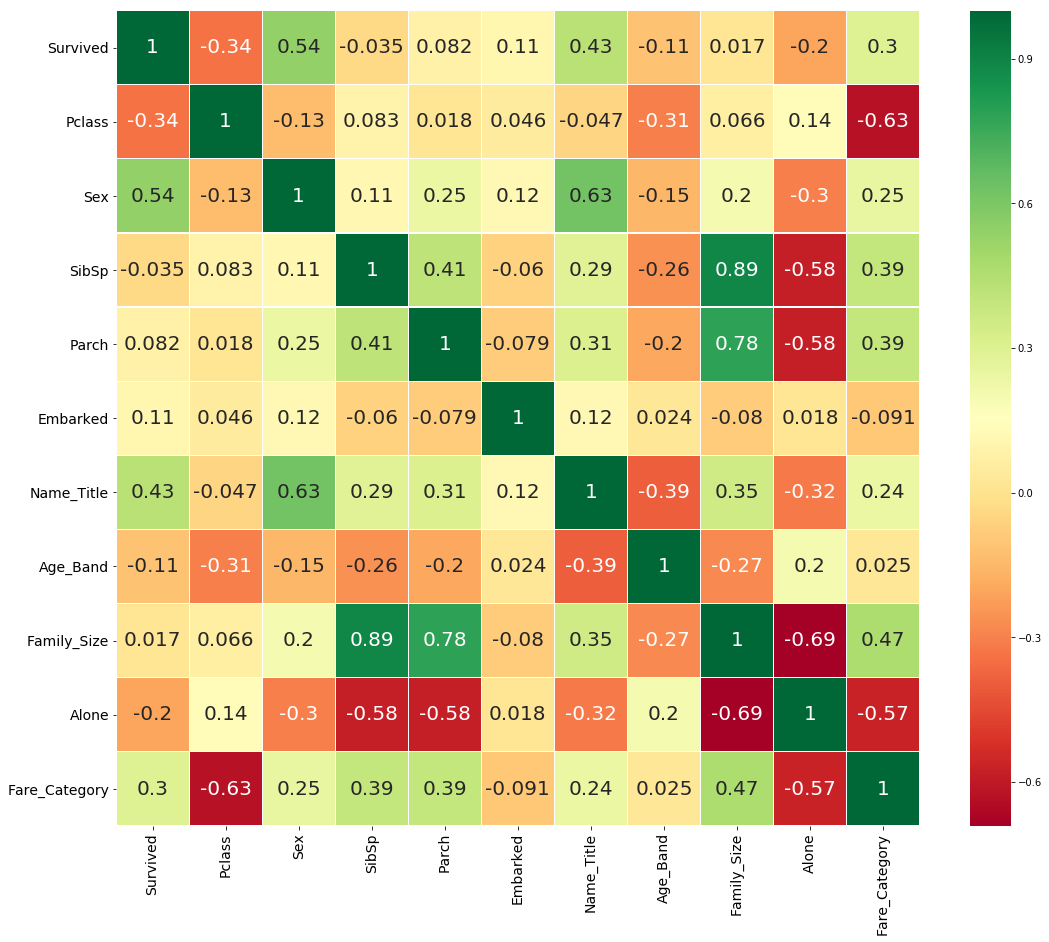

In [50]:
# Plotting the correlation map of all the remaining features.

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<b><h1><center>Part - 3: Predictive Modelling</center></h1></b></br>
Now that the data is completely prepared. Now the data can be fed into some greate Machine Learning algorithms to predict (classify) whether a person will survive or not.

-  Following are some Machine Learning algorithms that will be applied to perform the clasification.
    -  Logistic Regression
    -  Support Vector Machines(Linear and radial)
    -  Random Forest
    -  K-Nearest Neighbours
    -  Naive Bayes
    -  Decision Tree

<b><h2>Importing all Machine Learning Packages

In [51]:
# Importing all the required libraries
# The name of the libraries gives a hint for what it is being used for.

# Importing classifier algorithms to use.
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# For Splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split

# For calculation metrics like accuracy.
from sklearn import metrics

# To generate confusion matrix.
from sklearn.metrics import confusion_matrix

<b><h2>Splitting the Data into for Training and Testing

In [52]:
# Splitting the data into Training and Testing Sets.
train_data, test_data = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# Dataset has all the columns of inputs along with the output column altogether.
# Separating the Output from the Input.

# Storing input in 'train_input' and output into 'train_output' for training sets.
train_input = train_data[train_data.columns[1:]]
train_output = train_data[train_data.columns[:1]]

# Storing input in 'test_input' and output into 'test_output' for testing sets.
test_input = test_data[test_data.columns[1:]]
test_output = test_data[test_data.columns[:1]]

# Storing input in 'X' and output into 'Y' for entire dataset.
X = data[data.columns[1:]]
Y = data['Survived']

<b><h2>Applying Machine Learning Algorithms

<b>1. Logistic Regression

In [53]:
# Applying Logistic Regression Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = LogisticRegression()
model.fit(train_input,train_output)
prediction_1 = model.predict(test_input)
Accuracy_LogisticRegression = metrics.accuracy_score(prediction_1, test_output)
print('Accuracy for Logistic Regression', Accuracy_LogisticRegression)

Accuracy for Logistic Regression 0.8171641791044776


<b>2. Support Vector Machines (Linear)

In [54]:
# Applying Support Vector Machines (Linear) Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_input, train_output)
prediction_2 = model.predict(test_input)
Accuracy_SVM_Linear = metrics.accuracy_score(prediction_2, test_output)
print('Accuracy for Support Vector Machines (Linear)', Accuracy_SVM_Linear)

Accuracy for Support Vector Machines (Linear) 0.8171641791044776


<b>3. Support Vector Machines (Radial)

In [55]:
# Applying Support Vector Machines (Radial) Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_input, train_output)
prediction_3 = model.predict(test_input)
Accuracy_SVM_Radial = metrics.accuracy_score(prediction_3, test_output)
print('Accuracy for Support Vector Machines (Radial)', Accuracy_SVM_Radial)

Accuracy for Support Vector Machines (Radial) 0.835820895522388


<b>4. Random Forest

In [56]:
# Applying Random Forests Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = RandomForestClassifier(n_estimators=100)
model.fit(train_input, train_output)
prediction_4 = model.predict(test_input)
Accuracy_RandomForest = metrics.accuracy_score(prediction_4, test_output)
print('Accuracy for Random Forests', Accuracy_RandomForest)

Accuracy for Random Forests 0.8208955223880597


<b>5. K-Nearest Neighbours

In [57]:
# Applying KNN Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = KNeighborsClassifier() 
model.fit(train_input, train_output)
prediction_5 = model.predict(test_input)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction_5,test_output))

The accuracy of the KNN is 0.832089552238806


The accuracy of KNN Model changes with the number of neighbors. the default value of the number of neighbors is 5 but a different number of neighbors can be used while applying the model.

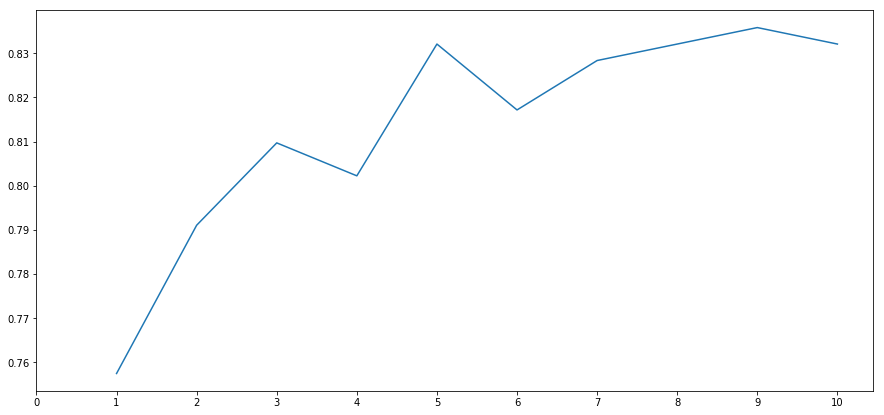

Accuracies for different values of n: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] and the maximum accuracy is  0.835820895522388


In [58]:
# Calculating and Plotting accuracies for different number of neighbors in the KNN model.

indexes = list(range(1,11))
series = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_input,train_output)
    prediction=model.predict(test_input)
    series = series.append(pd.Series(metrics.accuracy_score(prediction,test_output)))
plt.plot(indexes, series)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.show()
print('Accuracies for different values of n:',series.values,'and the maximum accuracy is ',series.values.max())

<b>6. Naive Bayes

In [59]:
# Applying Gusassian Naive Bayes Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = GaussianNB()
model.fit(train_input, train_output)
prediction_6 = model.predict(test_input)
print('Accuracy for Guassian NaiveBayes is',metrics.accuracy_score(prediction_6, test_output))

Accuracy for Guassian NaiveBayes is 0.8134328358208955


<b>7. Decision Tree

In [60]:
# Applying Decision Trees Model.
# Fitting the Model with training input and output sets.
# Predicting the output for testing set using the testing input.
# Claculating the Accuracy of the Model using predicted and the actual outputs of the testing set.

model = DecisionTreeClassifier()
model.fit(train_input, train_output)
prediction_7 = model.predict(test_input)
print('Accuracy for Decision Tree',metrics.accuracy_score(prediction_7, test_output))

Accuracy for Decision Tree 0.8097014925373134


<b><h2>Cross Validation</h2></b></br>
Most common Cross Validation technique is K Fold Cross Validation. It is a technique where the data is divided into some parts. One part is used as the testing set and the others are used to for training. In each iteration, a different part of the divided data set is used as the testing set and the remaining ones as the training sets. The accuracies and errors are then averaged to get the average accuracy of the algorithm.</br>
Cross Validation is also used to avoid overfitting and underfitting.

In [61]:
# KFold Cross Validation is performed in the tutorial.
# To perform Corss Validation, a few libraries need to be imported.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Splitting the dataset into 10 equal parts.
kfold = KFold(n_splits=10, random_state=22)

# Arrays to stores accuracies, means and standard deviations for all the models applied.
accuracy = []
mean = []
std = []

# Names of all the Classifiers altogether.
Classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN',
             'Decision Tree','Naive Bayes','Random Forest']

# Storing all the models altogther.
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

# Setting a for loop to perform cross validation on all models.
for i in models:
    model = i
    # Storing cross validation score of model i.
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    
    # Storing the mean, standard deviation and accuracies of the model i in the respective arrays.
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

# Creating a DataFrame for the mean and Standard Deviation and printing out their values.
new_dataFrame = pd.DataFrame({'CV Mean':mean,'Std':std},index=Classifiers)
new_dataFrame

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.804757,0.028595
Naive Bayes,0.801386,0.028999
Random Forest,0.810362,0.028771


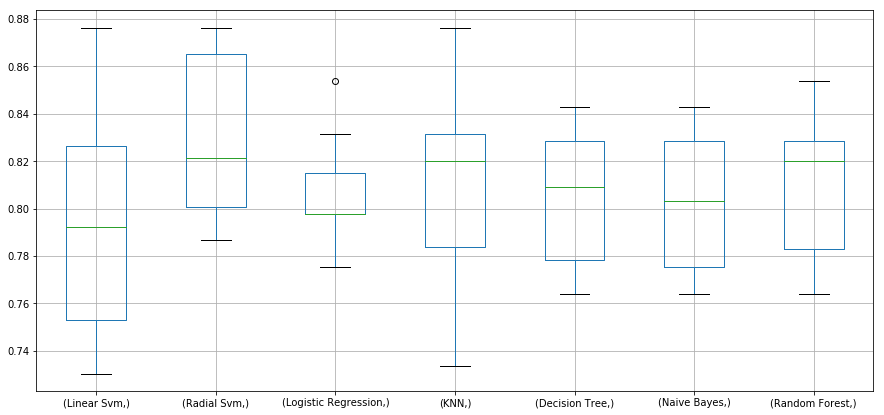

In [62]:
# Box Plot for the accuracies of all the Models.

plt.subplots(figsize=(15, 7))
box = pd.DataFrame(accuracy,index=[Classifiers])
box.T.boxplot()

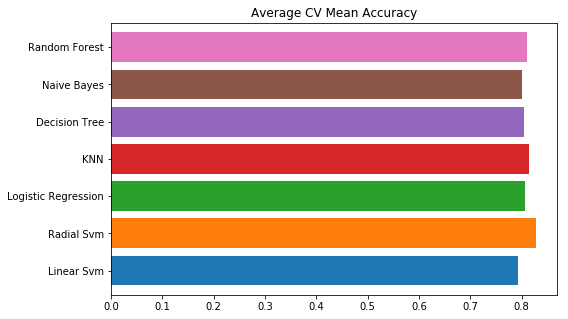

In [63]:
# Barplot fot the Average Cross Validation Mean Accuracy of all Models.

new_dataFrame['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b><h2>Confusion Matrix

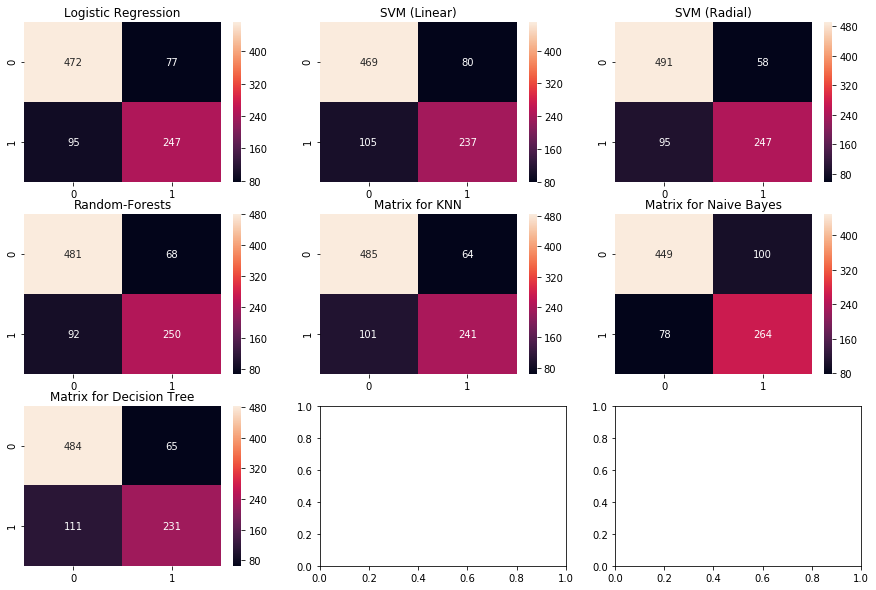

In [64]:
# Plotting Confusion Matrices for all Models.

f,ax = plt.subplots(3,3, figsize=(15,10))

prediction = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,prediction),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Logistic Regression')

prediction = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,prediction),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('SVM (Linear)')

prediction = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,prediction),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('SVM (Radial)')

prediction = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,prediction),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Random-Forests')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for KNN')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Decision Tree')

plt.show()

<b><h2>Tuning of Hyper Parameters</h2></b></br>
Hyperparameters are tuned to get the best possible values for them. Only the tuning of the 2 best models is done below.

<b>1. Support Vector Machine

In [65]:
# Tuning Hyperparamaeters for linear and radial Support Vector Machine Models.

# Importing Relevant Library.
from sklearn.model_selection import GridSearchCV

# Storing multiple values of Hyperparameters to be tuned.
C=[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['linear','rbf']

# Storing all hyperparameters altogether.
hyper={'kernel':kernel,'C':C,'gamma':gamma}

# Applying 'Grid Search CV' method and fitting the inputs and outputs of the entire dataset in the model. 
search=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
search.fit(X,Y)

# Printng out the best accuracy result and the best estimators.
print(search.best_score_)
print(search.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   10.1s finished


<b>2. Random Forests

In [66]:
# Storing multiple values of Hyperparameters to be tuned.
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}

# Applying 'Grid Search CV' method and fitting the inputs and outputs of the entire dataset in the model. 
search=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
search.fit(X,Y)

# Printng out the best accuracy result and the best estimators.
print(search.best_score_)
print(search.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.9s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


<b><h2>Ensembling</h2></b></br>
It is a combination of multiple simpler models into a single powerful model. There are 3 ways to perform ensembling.
Voting Classifier, Bagging and Boosting.

<b>1. Voting Classifier</b></br>
It is the simplest type of ensembling where the predictions of all the sub_models are averaged together to give the result. All submodels or base models maybe of different types.

In [67]:
# Imprting Relevant Library.
from sklearn.ensemble import VotingClassifier

# Using Voting Classifier to ensemble all the models altogether and fitting the training datasets.
ensembling = VotingClassifier(estimators=[('LR',LogisticRegression(C=0.05)),
                                          ('SVM',svm.SVC(kernel='linear',probability=True)),
                                          ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                          ('KNN',KNeighborsClassifier(n_neighbors=10)),
                                          ('RF',RandomForestClassifier(n_estimators=500,random_state=0)),
                                          ('NB',GaussianNB()),
                                          ('DT',DecisionTreeClassifier(random_state=0))],
                              voting='soft').fit(train_input,train_output)

# Printing out the accuracy of the ensembled model.
print('Accuracy of Ensembeled Model:',ensembling.score(test_input,test_output))

# Performing Cross Validation on the ensembled model.
cross=cross_val_score(ensembling,X,Y, cv = 10,scoring = "accuracy")

# Printing out the Cross Validation Score of the ensembled model.
print('Cross Validation Score:',cross.mean())

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy of Ensembeled Model: 0.8246268656716418


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The tr

Cross Validation Score: 0.8237660310974917


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<b>2. Bagging</b></br>
Similar type of classifiers are applied on small parts of the dataset and the predictions are then averaged.

In [68]:
# Importing Relevant Library.
from sklearn.ensemble import BaggingClassifier

<b>a). Bagged KNN:

In [69]:
# Bagging KNN Classifier.
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)

# Fitting Training Datasets.
model.fit(train_input, train_output)

# Predicting outputs for the testing set.
prediction = model.predict(test_input)

# Printing out the accuracy of the Bagged KNN.
print('Accuracy of Bagged KNN:',metrics.accuracy_score(prediction, test_output))

# Calculating and Printing out the Cross Validation Score of the Bagged KNN.
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('Cross validation Score:',result.mean())

Accuracy of Bagged KNN: 0.835820895522388
Cross validation Score: 0.8148893428668709


<b>b). Bagged Decision Tree:

In [70]:
#Bagging Decision Tree Classifier.
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)

# Fitting Training Datasets.
model.fit(train_input, train_output)

# Predicting outputs for the testing set.
prediction = model.predict(test_input)

# Printing out the accuracy of the Bagged Decision Tree.
print('Accuracy for Bagged Decision Tree:',metrics.accuracy_score(prediction,test_output))

# Calculating and Printing out the Cross Validation Score of the Bagged Decision Tree.
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('Cross validation Score:',result.mean())

Accuracy for Bagged Decision Tree: 0.8246268656716418
Cross validation Score: 0.8204826353421859


<b>2. Boosting</b></br>
It involves sequential learning of classifiers. It enhances a weak model step by step. A model is first trained on the complete data and in the next iteration it focuses more on the wronlgy predicted data. The process is repeated continuously until the limit of accuracy is acieved.

In [71]:
# Adaptive Boosting.

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')

print('Cross validation Score of AdaBoost:',result.mean())

Cross validation Score of AdaBoost: 0.8249526160481218


In [72]:
# Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')

print('Cross validation Score of Gradient Boosting:',result.mean())

Cross validation Score of Gradient Boosting: 0.8182862331176939


In [73]:
# Hyperparameter Tuning for Adaptive Boosting.

n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}

gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=hyper, verbose=True)

gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
# Plotting Confusion Matrix for the best model which is Adaptive Boosting.

adap = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(adap,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result), cmap='summer_r', annot=True, fmt='2.0f')
plt.show()

<b><h2>Importance of Features</h2></b></br>
The importance of different features according to the model can be seen in the below plots.

In [ ]:
# Bar Plots for the 3 best Machine Learning Algorithms showing the importance of all the features individually.

f,ax = plt.subplots(2,2,figsize = (16,16))

# Model 1: Random Forests.
model_1 = RandomForestClassifier(n_estimators=500,
                                 random_state=0)
model_1.fit(X,Y)
pd.Series(model_1.feature_importances_,X.columns).sort_values(ascending=False).plot.barh(width=0.7,
                                                                                       ax=ax[0,0])
ax[0,0].set_title('Feature Importance - Random Forests')

# Model 2: Adaptive Bosting.
model_2 = AdaBoostClassifier(n_estimators=200,
                             learning_rate=0.05,
                             random_state=0)
model_2.fit(X,Y)
pd.Series(model_2.feature_importances_,X.columns).sort_values(ascending=False).plot.barh(width=0.7,
                                                                                       ax=ax[0,1])
ax[0,1].set_title('Feature Importance - AdaBoost')

# Model 3: Stochastic Gradient Boosting.
model_3 = GradientBoostingClassifier(n_estimators=500,
                                     learning_rate=0.1,
                                     random_state=0)
model_3.fit(X,Y)
pd.Series(model_3.feature_importances_,X.columns).sort_values(ascending=False).plot.barh(width=0.8,
                                                                                         ax=ax[1,0])
ax[1,0].set_title('Feature Importance  Gradient Boosting')

plt.show()

<b><center><h1>This is it, for now...!